## 1. Importar las librerías necesarias

Importamos las librerías principales como *pandas* para el manejo de datos, *matplotlib* y *seaborn* para las visualizaciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargar los datasets

Se cargan los datasets books.csv (libros), ratings.csv (calificaciones de los usuarios) y to_read.csv (libros que los usuarios marcan para leer).

In [2]:

df_books = pd.read_csv("dataset/books.csv")
df_ratings = pd.read_csv("dataset/ratings.csv")
df_to_read = pd.read_csv("dataset/to_read.csv")
tags_df = pd.read_csv("dataset//tags.csv")
book_tags_df = pd.read_csv("dataset/book_tags.csv")

## 3. Explorar la Información de los Datasets

Esta celda muestra la estructura de cada dataset, el número de columnas y si hay valores faltantes o problemas con los tipos de datos.

In [3]:
# Información sobre el dataset de libros
print("Información del dataset de libros:")
df_books.info()

# Información sobre el dataset de ratings
print("\nInformación del dataset de ratings:")
df_ratings.info()

# Información sobre el dataset 'to_read'
print("\nInformación del dataset 'to_read':")
df_to_read.info()

# Información sobre el dataset de tags
print("\nInformación del dataset de tags:")
tags_df.info()

# Información sobre el dataset de book_tags
print("\nInformación del dataset de book_tags:")
book_tags_df.info()

Información del dataset de libros:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_coun

## 4. Limpieza Inicial de los Datos
Se eliminan columnas que no son útiles para el sistema de recomendación. Se eliminan las filas que tienen valores nulos en original_publication_year porque no podemos determinar el año de publicación de esos libros y eso puede afectar a nuestro análisis. Se imputan valores faltantes en la columna language_code con la etiqueta "unknown".

In [4]:
# 1. Eliminar las columnas que no son relevantes para el modelo de recomendación
df_books.drop(columns=['id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13','original_title','image_url','work_ratings_count','work_text_reviews_count',
                       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'small_image_url'], inplace=True)

# 2. Eliminar filas con valores nulos en `original_publication_year`
df_books = df_books.dropna(subset=['original_publication_year'])

# 3. Imputar "unknown" en `language_code` para valores nulos
df_books.fillna({'language_code':'unknown'}, inplace=True)

## 5. Estadísticas Descriptivas de los Datasets
Generamos estadísticas descriptivas de los datasets, como media, desviación estándar, mínimos, máximos, etc., para obtener un resumen general de los datos.

In [5]:
print("\nEstadísticas descriptivas del dataset de libros:")
print(df_books.describe().round(2))

print("\nEstadísticas descriptivas del dataset de ratings:")
print(df_ratings.describe().round(2))

print("\nEstadísticas descriptivas del dataset 'to_read':")
print(df_to_read.describe().round(2))

print("\nEstadísticas descriptivas del dataset de tags:")
print(tags_df.describe().round(2))

print("\nEstadísticas descriptivas del dataset de book_tags:")
print(book_tags_df.describe().round(2))



Estadísticas descriptivas del dataset de libros:
           book_id  original_publication_year  average_rating  ratings_count
count      9979.00                    9979.00         9979.00        9979.00
mean    5267498.38                    1981.99            4.00       54046.36
std     7580057.44                     152.58            0.25      157508.16
min           1.00                   -1750.00            2.47        2716.00
25%       46200.00                    1990.00            3.85       13569.50
50%      394535.00                    2004.00            4.02       21200.00
75%     9394612.50                    2011.00            4.18       41084.00
max    33288638.00                    2017.00            4.82     4780653.00

Estadísticas descriptivas del dataset de ratings:
         book_id    user_id     rating
count  981756.00  981756.00  981756.00
mean     4943.28   25616.76       3.86
std      2873.21   15228.34       0.98
min         1.00       1.00       1.00
25%      24

## 6. Detectar y Eliminar Duplicados
Verificamos si hay filas duplicadas en los datasets y las eliminamos para evitar redundancias en los datos.

In [6]:
# Verificar si hay duplicados en los datasets
print("\nValores duplicados en el dataset de libros:", df_books.duplicated().sum())
print("Valores duplicados en el dataset de ratings:", df_ratings.duplicated().sum())
print("Valores duplicados en el dataset 'to_read':", df_to_read.duplicated().sum())
print("Valores duplicados en el dataset de tags:", tags_df.duplicated().sum())
print("Valores duplicados en el dataset de book_tags:", book_tags_df.duplicated().sum())


Valores duplicados en el dataset de libros: 0
Valores duplicados en el dataset de ratings: 1644
Valores duplicados en el dataset 'to_read': 0
Valores duplicados en el dataset de tags: 0
Valores duplicados en el dataset de book_tags: 6


In [7]:
# Eliminar duplicados si los hay
df_books.drop_duplicates(inplace=True)
df_ratings.drop_duplicates(inplace=True)
df_to_read.drop_duplicates(inplace=True)
tags_df.drop_duplicates(inplace=True)
book_tags_df.drop_duplicates(inplace=True)

## 7. Distribución de Ratings
Se visualiza la distribución de las calificaciones de los usuarios, lo que nos permite observar la tendencia general de las valoraciones.

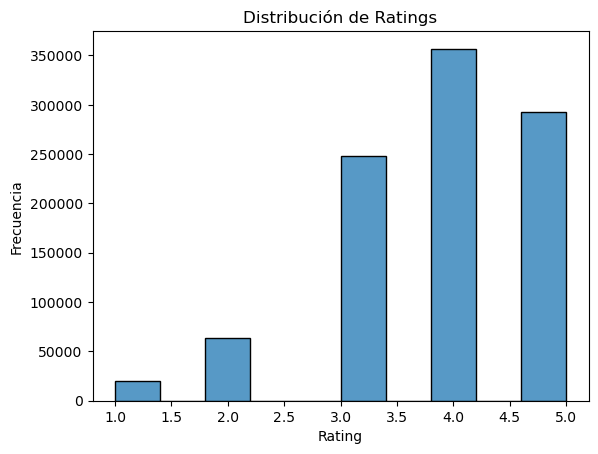

In [8]:
sns.histplot(df_ratings['rating'], kde=False, bins=10)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

## 8. Análisis de Outliers en Ratings
Se utiliza un boxplot para detectar posibles outliers en los ratings. Los outliers pueden distorsionar el modelo de recomendación, por lo que es importante identificarlos.

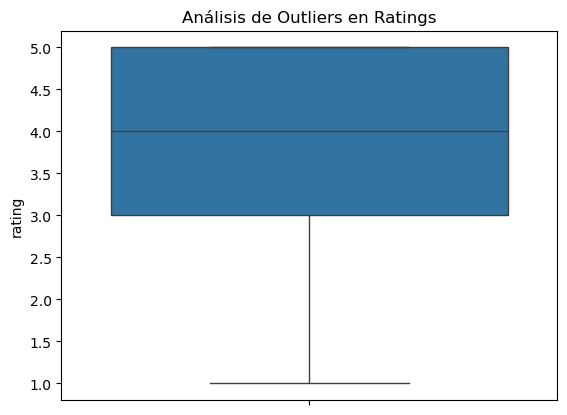

In [9]:
sns.boxplot(df_ratings['rating'])
plt.title('Análisis de Outliers en Ratings')
plt.show()


## 9. Distribución de Ratings por Libro
Visualizamos la cantidad de ratings por libro para ver si hay libros que tienen muy pocos ratings, lo que puede afectar la calidad de las recomendaciones.

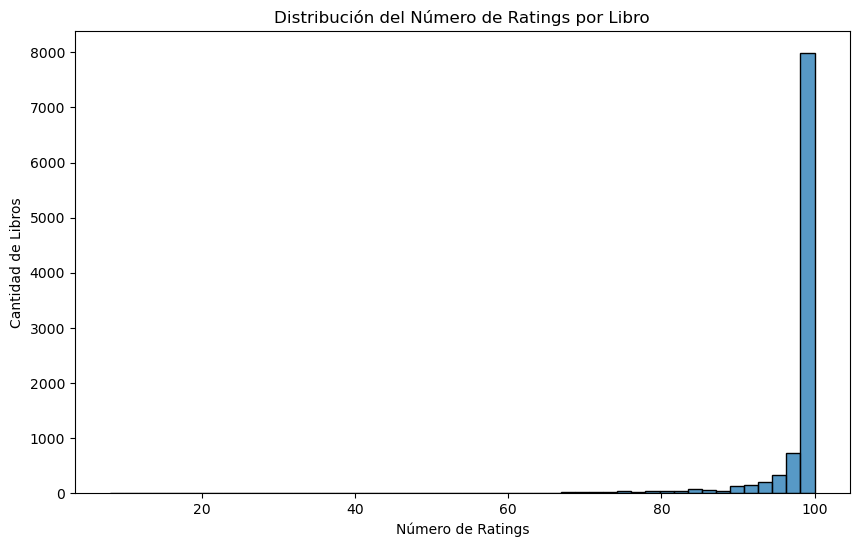

In [10]:
ratings_per_book = df_ratings['book_id'].value_counts()
plt.figure(figsize=(10,6))
sns.histplot(ratings_per_book, kde=False, bins=50)
plt.title('Distribución del Número de Ratings por Libro')
plt.xlabel('Número de Ratings')
plt.ylabel('Cantidad de Libros')
plt.show()

## 10. Filtrar Libros con Suficientes Ratings
Se establece un umbral de 50 ratings por libro, lo que asegura que sólo trabajemos con libros que tienen suficientes datos para generar recomendaciones fiables.

In [11]:
# Establecer un umbral para la cantidad mínima de ratings por libro
min_ratings_per_book = 50
popular_books = ratings_per_book[ratings_per_book >= min_ratings_per_book].index

# Filtrar los ratings solo para libros con suficientes ratings
df_ratings = df_ratings[df_ratings['book_id'].isin(popular_books)]

## 11. Mapeo de Etiquetas a Libros

In [12]:
# Mapear las etiquetas con los libros
book_tags_combined = pd.merge(book_tags_df, tags_df, on='tag_id', how='inner')

# Agrupar por libro y concatenar las etiquetas
book_tags_combined = book_tags_combined.groupby('goodreads_book_id')['tag_name'].apply(lambda x: ' '.join(x)).reset_index()

# Unir las etiquetas al dataset de libros
books_with_tags = pd.merge(df_books, book_tags_combined, left_on='book_id', right_on='goodreads_book_id', how='left')

# Verificar la nueva columna de etiquetas
print(books_with_tags[['book_id', 'title', 'tag_name']].head())

   book_id                                              title  \
0  2767052            The Hunger Games (The Hunger Games, #1)   
1        3  Harry Potter and the Sorcerer's Stone (Harry P...   
2    41865                            Twilight (Twilight, #1)   
3     2657                              To Kill a Mockingbird   
4     4671                                   The Great Gatsby   

                                            tag_name  
0  to-read fantasy favorites currently-reading yo...  
1  to-read fantasy favorites currently-reading yo...  
2  to-read fantasy favorites currently-reading yo...  
3  to-read favorites currently-reading young-adul...  
4  to-read favorites currently-reading young-adul...  


## 12. Vectorizar las etiquetas

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizar las etiquetas usando TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # Puedes ajustar el número de features
tag_vectors = tfidf.fit_transform(books_with_tags['tag_name'].fillna(''))

# Convertir los vectores en un DataFrame y agregar al dataset de libros
tag_vectors_df = pd.DataFrame(tag_vectors.toarray(), index=books_with_tags.index)
books_with_tags = pd.concat([books_with_tags, tag_vectors_df], axis=1)

# Eliminar la columna de etiquetas
books_with_tags.drop(columns=['tag_name', 'goodreads_book_id'], inplace=True)

# Verificar las nuevas columnas de características
print(books_with_tags.head())


   book_id                      authors  original_publication_year  \
0  2767052              Suzanne Collins                     2008.0   
1        3  J.K. Rowling, Mary GrandPré                     1997.0   
2    41865              Stephenie Meyer                     2005.0   
3     2657                   Harper Lee                     1960.0   
4     4671          F. Scott Fitzgerald                     1925.0   

                                               title language_code  \
0            The Hunger Games (The Hunger Games, #1)           eng   
1  Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                            Twilight (Twilight, #1)         en-US   
3                              To Kill a Mockingbird           eng   
4                                   The Great Gatsby           eng   

   average_rating  ratings_count         0         1         2  ...        90  \
0            4.34        4780653  0.000000  0.148113  0.189252  ...  0.064469

## 13. Modificación del Dataset Combinado con las Etiquetas

In [14]:
# Combinar los ratings con los libros y sus etiquetas vectorizadas
df_combined = pd.merge(df_ratings, books_with_tags, on='book_id', how='inner')

# Verificar el dataframe combinado con etiquetas
print(df_combined.head())

   book_id  user_id  rating                      authors  \
0        1      314       5  J.K. Rowling, Mary GrandPré   
1        1      439       3  J.K. Rowling, Mary GrandPré   
2        1      588       5  J.K. Rowling, Mary GrandPré   
3        1     1169       4  J.K. Rowling, Mary GrandPré   
4        1     1185       4  J.K. Rowling, Mary GrandPré   

   original_publication_year  \
0                     2005.0   
1                     2005.0   
2                     2005.0   
3                     2005.0   
4                     2005.0   

                                               title language_code  \
0  Harry Potter and the Half-Blood Prince (Harry ...           eng   
1  Harry Potter and the Half-Blood Prince (Harry ...           eng   
2  Harry Potter and the Half-Blood Prince (Harry ...           eng   
3  Harry Potter and the Half-Blood Prince (Harry ...           eng   
4  Harry Potter and the Half-Blood Prince (Harry ...           eng   

   average_rating  rating

## 14. Codificación de Usuarios y Libros para Embeddings
Creamos un mapeo de user_id y book_id a índices numéricos, que serán necesarios para la capa de embeddings en el modelo. Esto convierte los identificadores de usuarios y libros a valores que el modelo de aprendizaje automático pueda interpretar.

In [15]:
# Crear mapeos para usuarios y libros
user_ids = df_combined['user_id'].unique()
book_ids = df_combined['book_id'].unique()

# Mapeo de user_id y book_id a índices numéricos
user_to_index = {user_id: index for index, user_id in enumerate(user_ids)}
book_to_index = {book_id: index for index, book_id in enumerate(book_ids)}

# Aplicar los mapeos en el dataset de ratings
df_combined['user_index'] = df_combined['user_id'].map(user_to_index)
df_combined['book_index'] = df_combined['book_id'].map(book_to_index)

# Verificar los mapeos
print(df_combined[['user_id', 'book_id', 'user_index', 'book_index']].head())

   user_id  book_id  user_index  book_index
0      314        1           0           0
1      439        1           1           0
2      588        1           2           0
3     1169        1           3           0
4     1185        1           4           0


## 15. Codificación de Language_code y limpieza final

In [16]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

# Codificar la columna 'language_code'
df_combined['language_code_encoded'] = label_encoder.fit_transform(df_combined['language_code'])

# Verificar las primeras filas para confirmar
print(df_combined[['language_code', 'language_code_encoded']].head())

# Eliminar columnas no necesarias
df_combined.drop(columns=['language_code'], inplace=True)

  language_code  language_code_encoded
0           eng                      3
1           eng                      3
2           eng                      3
3           eng                      3
4           eng                      3


## 16. Normalización de Características

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas que vamos a normalizar
columns_to_normalize = ['original_publication_year', 'average_rating', 'ratings_count']

# Inicializar el scaler
scaler = MinMaxScaler()

# Aplicar el ajuste y la transformación sobre las columnas seleccionadas
df_combined[columns_to_normalize] = scaler.fit_transform(df_combined[columns_to_normalize])

# Verificar los resultados
print(df_combined[columns_to_normalize].describe())

       original_publication_year  average_rating  ratings_count
count               79483.000000    79483.000000   79483.000000
mean                    0.974759        0.578749       0.030116
std                     0.106041        0.127499       0.076638
min                     0.000000        0.000000       0.000000
25%                     0.983760        0.497462       0.002698
50%                     0.994587        0.583756       0.007111
75%                     0.997113        0.670051       0.023622
max                     1.000000        1.000000       1.000000


## 17. Normalización de los Ratings
Se utiliza MinMaxScaler para escalar los valores de los ratings entre 0 y 1. Esto permitirá que el modelo sea menos sensible al sesgo hacia las calificaciones más altas, proporcionando una mejor distribución de las preferencias de los usuarios.

In [18]:
# Normalización de los ratings
from sklearn.preprocessing import MinMaxScaler

# Normalizar los ratings a un rango de [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df_combined['normalized_rating'] = scaler.fit_transform(df_combined[['rating']])

# Mostrar una muestra de los datos normalizados
print(df_combined[['user_id', 'book_id', 'rating', 'normalized_rating']].head())

# Eliminar columnas no necesarias
df_combined = df_combined.drop(columns=['rating'])

   user_id  book_id  rating  normalized_rating
0      314        1       5               1.00
1      439        1       3               0.50
2      588        1       5               1.00
3     1169        1       4               0.75
4     1185        1       4               0.75


## 18. División de Conjuntos de Entrenamiento y Prueba
Dividimos los datos en dos conjuntos: 80% para el entrenamiento y 20% para la prueba. Esto nos permitirá entrenar el modelo en un conjunto y evaluarlo en el otro, asegurando que podamos medir su rendimiento con precisión.

In [19]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
df_combined = df_combined.drop(columns=['authors', 'title'])
train_combined, test_combined = train_test_split(df_combined, test_size=0.2, random_state=42)

# Mostrar la cantidad de datos en cada conjunto
print(f"Conjunto de entrenamiento: {train_combined.shape}")
print(f"Conjunto de prueba: {test_combined.shape}")

Conjunto de entrenamiento: (63586, 109)
Conjunto de prueba: (15897, 109)


## 19. Guardar los Datos Preprocesados
Guardamos los conjuntos de datos preprocesados como archivos CSV para que puedan ser utilizados en la próxima fase del proyecto, donde entrenaremos el modelo NCF.

In [20]:
# Guardar los datasets combinados preprocesados
train_combined.to_csv("train_dataset.csv", index=False)
test_combined.to_csv("test_dataset.csv", index=False)

print("Conjuntos de entrenamiento y prueba combinados guardados.")

Conjuntos de entrenamiento y prueba combinados guardados.
